Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.5043 - accuracy: 0.4823 - val_loss: 0.4866 - val_accuracy: 0.0000e+00
Epoch 2/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.4631 - accuracy: 0.4912 - val_loss: 0.4425 - val_accuracy: 0.0000e+00
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.4297 - accuracy: 0.4934 - val_loss: 0.4124 - val_accuracy: 0.0000e+00
Epoch 4/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3984 - accuracy: 0.4957 - val_loss: 0.3878 - val_accuracy: 0.0000e+00
Epoch 5/10
60000/60000 [==============================] - 9s 142us/step - loss: 0.3846 - accuracy: 0.4953 - val_loss: 0.3796 - val_accuracy: 0.0000e+00
Epoch 6/10
60000/60000 [==============================] - 8s 141us/step - loss: 0.3788 - accuracy: 0.4951 - val_loss: 0.3745 - val_accuracy: 0.0000e+00
Epoch 7/10
60000/60000 [==============

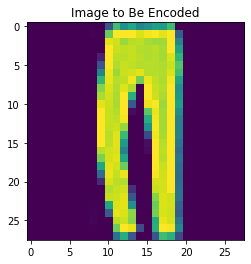

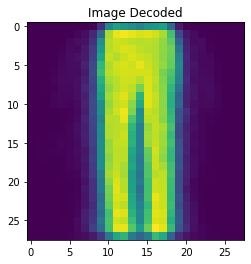

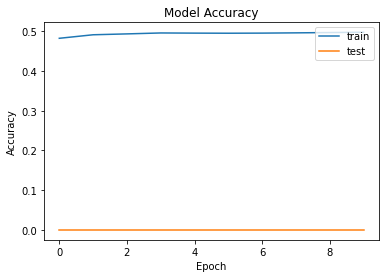

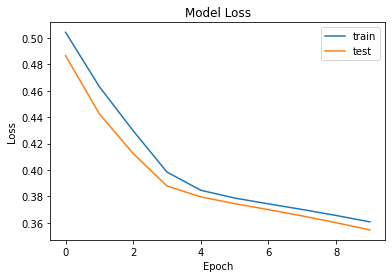

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from matplotlib import pyplot as plt

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)


encoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# Image Before Reconstruction
plt.imshow(x_test[2].reshape(28,28))
plt.title("Image to Be Encoded")
plt.show()

prediction = autoencoder.predict(x_test[2].reshape(1,784))

# Image After Reconstruction
plt.imshow(prediction.reshape(28,28))
plt.title("Image Decoded")
plt.show()

# Summarize History for Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Summarize History for Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()